# EDA & Data Cleaning - [Your Project Name Here]

## Local Code Imports - Do not delete

In [33]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# DO NOT REMOVE This
%reload_ext autoreload

In [35]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

In [36]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

## Code Imports

In [37]:
# Dataframes
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating age of fighters
import datetime

# Project Overview


## Background

## Data Description

### Data Dictionary

# EDA

## Load Data - All sources

In [38]:
data = pd.read_csv('../data/raw/data.csv.zip')

## Data Summary
Below we generate summary statistics on the data.

In [41]:
print('DataFrame Shape is {}'.format(data.shape))
print('This represents {} fights'.format(data.shape[0]))

DataFrame Shape is (1477, 895)
This represents 1477 fights


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


- With so many columns, the .info method doesn't give us much insight.  We need to look at different sections of the dataframe individually.

In [42]:
data.iloc[2,:].T

BPrev                                                                 2
BStreak                                                               0
B_Age                                                                38
B_Height                                                            172
B_HomeTown                                               Kanagawa Japan
B_ID                                                                721
B_Location                                                  Tokyo Japan
B_Name                                                    Takanori Gomi
B_Weight                                                             70
B__Round1_Grappling_Reversals_Landed                                  0
B__Round1_Grappling_Standups_Landed                                   0
B__Round1_Grappling_Submissions_Attempts                              0
B__Round1_Grappling_Takedowns_Attempts                                0
B__Round1_Grappling_Takedowns_Landed                            

- The majority of our columns are the same statistics, but for each round.  It would sense to condense these columns down to a summary of each fight (rounds 1-3 or 1-5 aggregated) and eventually have a dynamic statistic for each fighter's average fight statistics (dynamic meaning that they would update with each fight)

## Detailed Analysis & Results
Here we dig into the data a little deeper and identify areas for more extensive data cleaning and possible feature engineering.

In [12]:
# Create a new compressed dataframe that only has the statistics that we know about each fighter, before the fight begins. 
# i.e. what could be used before a fight, to predict the outcome
data_blue  = data.loc[:,['B_ID', 'B_Name', 'BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_Location', 'B_Weight']]
data_red   = data.loc[:,['R_ID', 'R_Name', 'RPrev', 'RStreak', 'R_Age', 'R_Height', 'R_HomeTown', 'R_Location', 'R_Weight']]
data_fight = data.loc[:,['Date', 'Event_ID', 'Fight_ID', 'Last_round', 'Max_round', 'winby', 'winner']]
data_compressed = pd.concat([data_fight, data_blue, data_red], axis=1)

In [23]:
# Change the column headings so that they all follow the same structure
columns_to_change = {{'Last_round': 'Last_Round', 'Max_round': 'Max_Round', 'winby': 'Win_By', 'winner': 'Winner'}
data_compressed   = data_compressed.rename(index=str, columns=columns_to_change)

SyntaxError: invalid syntax (<ipython-input-23-0c8856276922>, line 3)

### Visualizing the winners

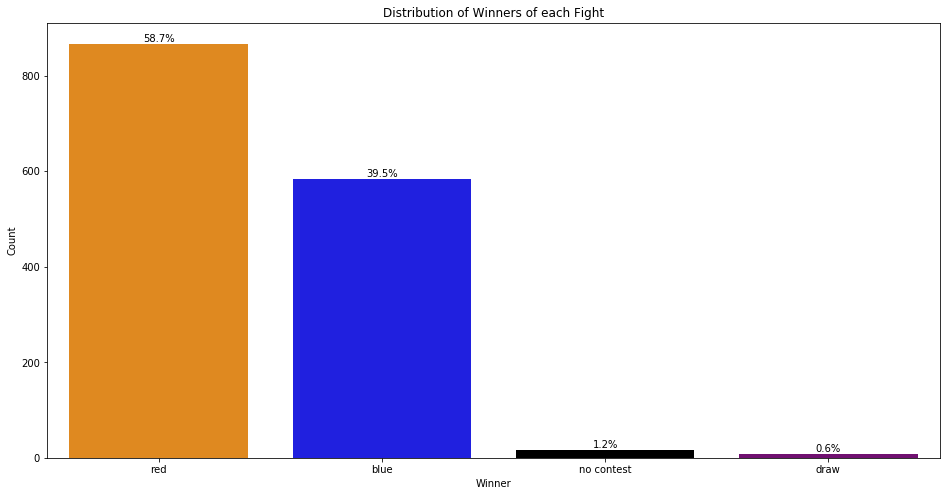

In [25]:
# Figure
plt.figure(figsize=(16, 8))

# Simple plot of winners
colors = ['darkorange', 'blue', 'black', 'purple']
ax = sns.countplot(x='winner', data=data, palette=colors);

# Title and Axis
ax.set(title='Distribution of Winners of each Fight');
ax.set_xlabel('Winner')
ax.set_ylabel('Count')

ncount = len(data)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]  # X coordinates of label
    y=p.get_bbox().get_points()[1,1]  # Y coordinates of label
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # Position the text

- In UFC the favoured/more well known fighter is normally assigned red.  which helps to explain the data above.

# Data Cleaning

We now need to drop variables that have no likely impact on the outcome of a fight. 
- Weight: Although in reality a fighter's weight is extremely important, within a single fight, both fighter's weights will be within a narrow window and very similar to each other, i.e. any difference will be negligible

## Drop unecessary columns and rows

### Weight

### No-contest rows

- The no contests are either due to illegal moves or failed drugs tests.  
- Example below between Nick Diaz and Anderson Silva was a no contest due to Anderson Silva failling a drugs test
- https://www.mmamania.com/2015/2/6/7992549/no-contest-anderson-silvas-victory-over-nick-diaz-at-ufc-183

In [32]:
# Example of no contest between Nick Diaz and Anderson Silva
data_compressed[data_compressed['Winner']=='no contest'].head(1).T

NameError: name 'data_compressed' is not defined

## Change Outcome label to integer

Many scikit-learn functions work with class labels in string format.  However we will convert these strings to integer labels to avoid technical glitches and also improve our computational performance.

In [43]:
# SPACE FOR CREATING CLASS LABELS